In [1]:

try:
    from pint import UnitRegistry
except ImportError:
    !pip install pint

# import units
from pint import UnitRegistry
units = UnitRegistry()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.0/294.0 kB 6.2 MB/s eta 0:00:00


In [2]:

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

Downloaded modsim.py


In [3]:

from modsim import *

In [4]:
init = State(y=381, v=0)

In [5]:
system = System(init=init,
                g=9.8,
                t_end=10)

In [6]:
def slope_func(t, state, system):
    y, v = state

    dydt = v
    dvdt = -system.g

    return dydt, dvdt

In [7]:
dydt, dvdt = slope_func(0, system.init, system)
dydt, dvdt

(0, -9.8)

In [8]:
results, details = run_solve_ivp(system, slope_func)
details.message

'The solver successfully reached the end of the integration interval.'

In [9]:
results.head()

,y,v
0.0,381.000,0.00
0.1,380.951,-0.98
0.2,380.804,-1.96
0.3,380.559,-2.94
0.4,380.216,-3.92


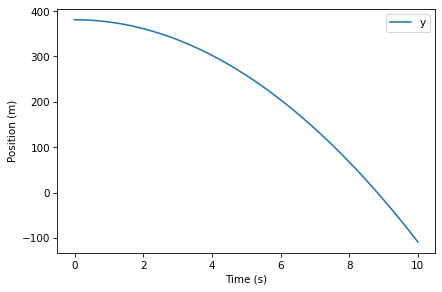

In [10]:
results.y.plot()

decorate(xlabel='Time (s)',
         ylabel='Position (m)')

In [11]:
results.iloc[-1].y

-108.99999999999983

In [12]:
t_crossings = crossings(results.y, 0)
t_crossings

array([8.81788535])

In [13]:
def event_func(t, state, system):
    y, v = state
    return y

In [14]:
results, details = run_solve_ivp(system, slope_func,
                                 events=event_func)
details.message

'A termination event occurred.'

In [15]:
t_end = results.index[-1]
t_end

8.817885349720553

In [16]:
y, v = results.iloc[-1]
y, v

(0.0, -86.41527642726145)

### Exercise 1



In [17]:
r_0 = 150e9
v_0 = 0
init = State(r=r_0,
             v=v_0)

In [18]:
radius_earth = 6.37e6  # meters
radius_sun = 696e6     # meters
r_final = radius_sun + radius_earth
r_final

702370000.0

In [19]:
t_end = 1e7

system = System(init=init,
                G=6.674e-11,
                m1=1.989e30,
                m2=5.972e24,
                r_final=radius_sun + radius_earth,
                t_end=t_end)

In [20]:
def universal_gravitation(state, system):

    r, v = state
    G, m1, m2 = system.G, system.m1, system.m2

    force = G * m1 * m2 / r**2
    return force

In [21]:
universal_gravitation(init, system)


3.5233701151999997e+22

In [22]:
def slope_func(t, state, system):
    y, v = state
    m2 = system.m2

    force = universal_gravitation(state, system)
    dydt = v
    dvdt = -force / m2

    return dydt, dvdt

In [23]:
slope_func(0, system.init, system)


(0.0, -0.005899815999999999)

In [24]:
def event_func(t, state, system):
    r, v = state
    return r - system.r_final

In [25]:
event_func(0, init, system)


149297630000.0

In [26]:
results, details = run_solve_ivp(system, slope_func,
                                 events=event_func)
details.message

'A termination event occurred.'

In [27]:
t_event = results.index[-1]
t_event

5599828.179418473

In [28]:

seconds = t_event * units.second
days = seconds.to(units.day)

In [29]:
results.index /= 60 * 60 * 24


In [30]:
results.r /= 1e9


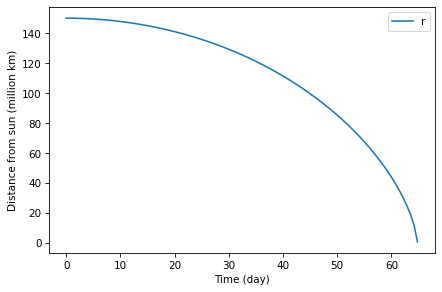

In [31]:
results.r.plot(label='r')

decorate(xlabel='Time (day)',
         ylabel='Distance from sun (million km)')